In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

**Data Preparation**

In [37]:
df = pd.read_excel('/content/drive/MyDrive/default of credit card clients.xls', skiprows=[0])
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [39]:
df.isna().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


**Exploratory Data Analysis**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [42]:
# Splitting the data into training (60%), validation (20%), and test sets (20%)
X = df.drop(columns='default payment next month').values
y = df['default payment next month'].values
X_train, X_testval, y_train, y_testval = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_testval, y_testval, test_size=0.5, random_state=42)

In [43]:
print(X.shape, X_train.shape, X_val.shape, X_test.shape, y.shape, y_train.shape, y_val.shape, y_test.shape, sep="\n")

(30000, 24)
(18000, 24)
(6000, 24)
(6000, 24)
(30000,)
(18000,)
(6000,)
(6000,)


**Decision Tree from scratch**

In [44]:
class Node:
  def __init__(self, entropy, samples, value, feature_index = None, threshold = None, left = None, right = None):
    self.entropy = entropy
    self.samples = samples
    self.value = value
    self.feature_index = feature_index
    self.threshold = threshold
    self.left = left
    self.right = right

In [45]:
class DecisionTree:
    def __init__(self, max_depth = 5, min_samples_split = 2):
      self.max_depth = max_depth
      self.min_samples_split = min_samples_split
      self.root = None

    # Calculating the entropy (impurity) of the node
    def entropy(self, y):
      label_counts = np.bincount(y)
      proportion = label_counts / len(y)
      entropy = -np.sum([p * np.log2(p) for p in proportion if p > 0])
      return entropy

    # Calculating the information gain (reduction in impurity) of the splitting
    def information_gain(self, y, y_left, y_right):
      p_left = len(y_left) / len(y)
      p_right = len(y_right) / len(y)
      inf_gain = self.entropy(y) - (p_left * self.entropy(y_left) + p_right * self.entropy(y_right))
      return inf_gain

    # Finding the feature whose splitting gives the highest information gain
    def best_split(self, X, y):
      best_gain = 0
      split_index, split_threshold = None, None
      n_samples, n_features = X.shape

      for feature_index in range(n_features):
          thresholds, classes = zip(*sorted(zip(X[:, feature_index], y)))
          # Threshold will be the midpoint between two points with different labels with maximum information gain
          for i in range(1, len(thresholds)):
              if classes[i] == classes[i - 1]:
                  continue
              threshold = (thresholds[i] + thresholds[i - 1]) / 2
              y_left = y[X[:, feature_index] <= threshold]
              y_right = y[X[:, feature_index] > threshold]
              gain = self.information_gain(y, y_left, y_right)

              if gain > best_gain:
                  best_gain = gain
                  split_index = feature_index
                  split_threshold = threshold

      return best_gain, split_index, split_threshold

    # Building the tree
    def build_tree(self, X, y, depth=0):
      n_samples, n_labels = len(y), len(np.unique(y))

      # Setting the stopping criteria
      if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
          leaf_value = Counter(y).most_common(1)[0][0]
          return Node(entropy=self.entropy(y), samples=n_samples, value=leaf_value)

      gain, feature_index, threshold = self.best_split(X, y)
      if gain == 0:
          leaf_value = Counter(y).most_common(1)[0][0]
          return Node(entropy=self.entropy(y), samples=n_samples, value=leaf_value)

      # Splitting the root node into left and right branches
      left_indices = X[:, feature_index] <= threshold
      right_indices = X[:, feature_index] > threshold
      left_child = self.build_tree(X[left_indices], y[left_indices], depth + 1)
      right_child = self.build_tree(X[right_indices], y[right_indices], depth + 1)

      return Node(
          entropy=self.entropy(y),
          samples=n_samples,
          value=Counter(y),
          feature_index=feature_index,
          threshold=threshold,
          left=left_child,
          right=right_child
      )

    def fit(self, X, y):
      self.root = self.build_tree(X, y)

    def predict_one(self, inputs, node):
      if node.left is None and node.right is None:
          return node.value
      if inputs[node.feature_index] <= node.threshold:
          return self.predict_one(inputs, node.left)
      return self.predict_one(inputs, node.right)

    def predict(self, X):
      return [self.predict_one(inputs, self.root) for inputs in X]

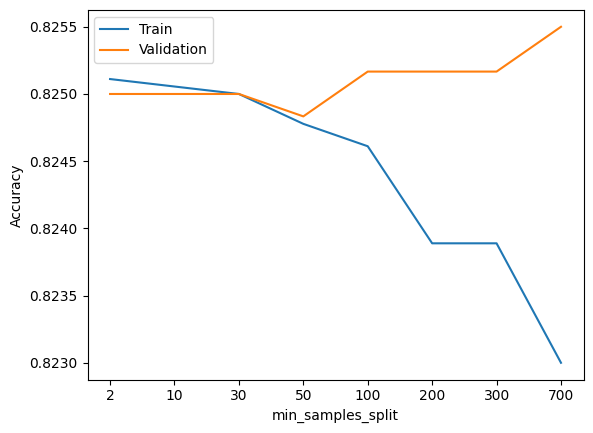

In [46]:
# Finding the optimum minimum number of samples to perform splitting
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]

accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    model = DecisionTree(min_samples_split = min_samples_split)
    model.fit(X_train,y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

* min_samples_split = 100 has been chosen because, at that value validation accuracy is high while training accuracy is close to it.

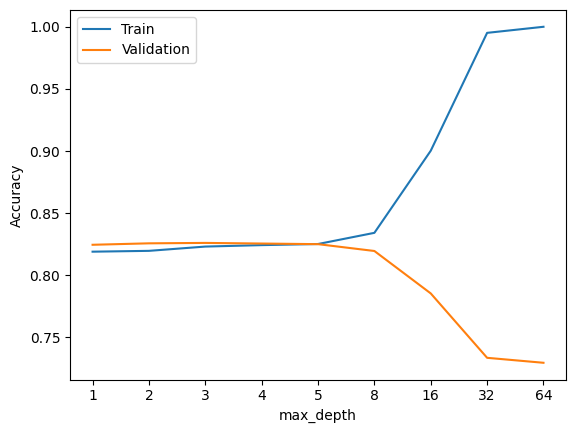

In [47]:
# Finding the optimum maximum depth in order to avoid overfitting
max_depth_list = [1,2, 3, 4, 5, 8, 16, 32, 64]

accuracy_list_train_2 = []
accuracy_list_val_2 = []

for max_depth in max_depth_list:
    model = DecisionTree(max_depth = max_depth)
    model.fit(X_train,y_train)
    predictions_train_2 = model.predict(X_train)
    predictions_val_2 = model.predict(X_val)
    accuracy_train_2 = accuracy_score(predictions_train_2, y_train)
    accuracy_val_2 = accuracy_score(predictions_val_2, y_val)
    accuracy_list_train_2.append(accuracy_train_2)
    accuracy_list_val_2.append(accuracy_val_2)

plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(max_depth_list )), labels=max_depth_list)
plt.plot(accuracy_list_train_2)
plt.plot(accuracy_list_val_2)
plt.legend(['Train','Validation'])

* max_depth = 5 has been chosen because at that value, both training and validation accuracies are high and overfitting is avoided.

In [48]:
tree = DecisionTree(max_depth = 5, min_samples_split = 100)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc, "\n", "Precision:", precision, "\n", "Recall:", recall, "\n", "F1 Score:", f1)

Accuracy: 0.8166666666666667 
 Precision: 0.672 
 Recall: 0.3711340206185567 
 F1 Score: 0.4781783681214421


**Decision Tree with scikit-learn**

In [49]:
sklearn_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

sklearn_tree.fit(X_train, y_train)

y_pred_sklearn = sklearn_tree.predict(X_test)

acc_skl = accuracy_score(y_test, y_pred_sklearn)
precision_skl = precision_score(y_test, y_pred_sklearn)
recall_skl = recall_score(y_test, y_pred_sklearn)
f1_skl = f1_score(y_test, y_pred_sklearn)

print("Accuracy:", acc_skl, "\n", "Precision:", precision_skl, "\n", "Recall:", recall_skl, "\n", "F1 Score:", f1_skl)

Accuracy: 0.8161666666666667 
 Precision: 0.6697736351531292 
 Recall: 0.3703976435935199 
 F1 Score: 0.4770033191085823


**Random Forest**

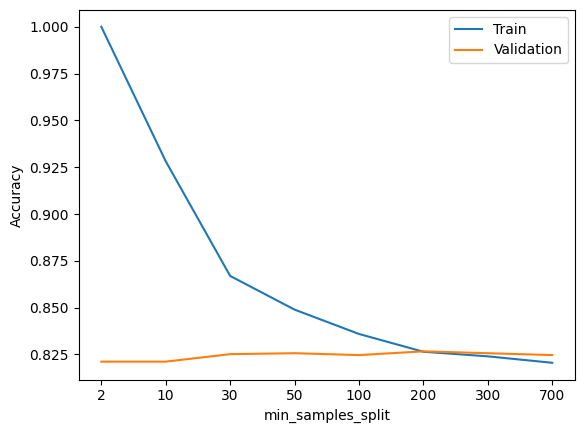

In [50]:
# Finding the optimum minimum number of examples to perform splitting
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700]

accuracy_list_train_rf = []
accuracy_list_val_rf = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split)
    model.fit(X_train, y_train)
    predictions_train_rf = model.predict(X_train)
    predictions_val_rf = model.predict(X_val)
    accuracy_train_rf = accuracy_score(predictions_train_rf, y_train)
    accuracy_val_rf = accuracy_score(predictions_val_rf, y_val)
    accuracy_list_train_rf.append(accuracy_train_rf)
    accuracy_list_val_rf.append(accuracy_val_rf)

plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train_rf)
plt.plot(accuracy_list_val_rf)
plt.legend(['Train','Validation'])

* min_samples_split = 250 has been chosen to get the best validation and training accuracies while avoiding overfitting.

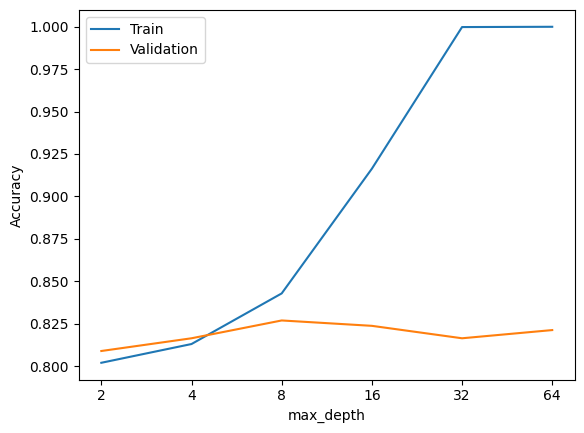

In [51]:
# Finding the optimum maximum depth
max_depth_list = [2, 4, 8, 16, 32, 64]

accuracy_list_train_rf_2 = []
accuracy_list_val_rf_2 = []

for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth)
    model.fit(X_train,y_train)
    predictions_train_rf_2 = model.predict(X_train)
    predictions_val_rf_2 = model.predict(X_val)
    accuracy_train_rf_2 = accuracy_score(predictions_train_rf_2, y_train)
    accuracy_val_rf_2 = accuracy_score(predictions_val_rf_2, y_val)
    accuracy_list_train_rf_2.append(accuracy_train_rf_2)
    accuracy_list_val_rf_2.append(accuracy_val_rf_2)

plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train_rf_2)
plt.plot(accuracy_list_val_rf_2)
plt.legend(['Train','Validation'])

* max_depth = 6 has been selected since at that point both validation and training accuracy scores are high and there's no overfitting.

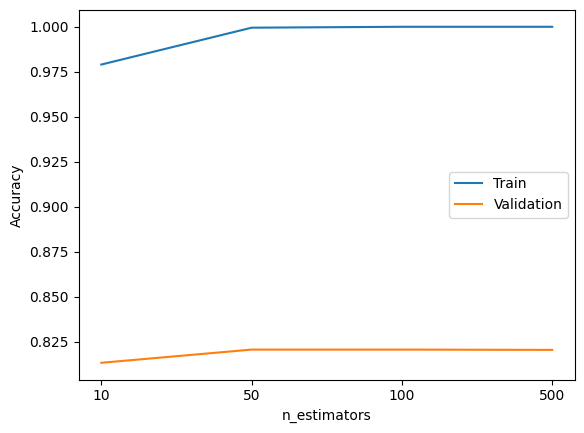

In [52]:
# Finding the optimum number of estimators
n_estimators_list = [10, 50, 100, 500]

accuracy_list_train_rf_3 = []
accuracy_list_val_rf_3 = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators)
    model.fit(X_train,y_train)
    predictions_train_rf_3 = model.predict(X_train)
    predictions_val_rf_3 = model.predict(X_val)
    accuracy_train_rf_3 = accuracy_score(predictions_train_rf_3, y_train)
    accuracy_val_rf_3 = accuracy_score(predictions_val_rf_3, y_val)
    accuracy_list_train_rf_3.append(accuracy_train_rf_3)
    accuracy_list_val_rf_3.append(accuracy_val_rf_3)

plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(n_estimators_list)), labels = n_estimators_list)
plt.plot(accuracy_list_train_rf_3)
plt.plot(accuracy_list_val_rf_3)
plt.legend(['Train','Validation'])

* n_estimators = 70 has been selected to get the maximum validation accuracy with the minumum margin with training accuracy.

In [53]:
random_forest_model = RandomForestClassifier(n_estimators = 70, max_depth = 6, min_samples_split = 250)
random_forest_model.fit(X_train,y_train)
y_pred_rf = random_forest_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Accuracy:", acc_rf, "\n", "Precision:", precision_rf, "\n", "Recall:", recall_rf, "\n", "F1 Score:", f1_rf)

Accuracy: 0.8133333333333334 
 Precision: 0.6808510638297872 
 Recall: 0.32989690721649484 
 F1 Score: 0.4444444444444444


**XGBoost**

In [54]:
n = int(len(X_train)*0.8)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1, verbosity = 1, random_state = 42, early_stopping_rounds = 10)
xgb_model.fit(X_train_fit, y_train_fit, eval_set = [(X_train_eval, y_train_eval)])
y_pred_xgb = xgb_model.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("Accuracy:", acc_xgb, "\n", "Precision:", precision_xgb, "\n", "Recall:", recall_xgb, "\n", "F1 Score:", f1_xgb)

[0]	validation_0-logloss:0.51635
[1]	validation_0-logloss:0.50185
[2]	validation_0-logloss:0.49057
[3]	validation_0-logloss:0.48160
[4]	validation_0-logloss:0.47465
[5]	validation_0-logloss:0.46896
[6]	validation_0-logloss:0.46410
[7]	validation_0-logloss:0.45983
[8]	validation_0-logloss:0.45627
[9]	validation_0-logloss:0.45350
[10]	validation_0-logloss:0.45151
[11]	validation_0-logloss:0.44964
[12]	validation_0-logloss:0.44777
[13]	validation_0-logloss:0.44635
[14]	validation_0-logloss:0.44518
[15]	validation_0-logloss:0.44422
[16]	validation_0-logloss:0.44303
[17]	validation_0-logloss:0.44240
[18]	validation_0-logloss:0.44174
[19]	validation_0-logloss:0.44071
[20]	validation_0-logloss:0.44015
[21]	validation_0-logloss:0.44019
[22]	validation_0-logloss:0.43995
[23]	validation_0-logloss:0.43950
[24]	validation_0-logloss:0.43929
[25]	validation_0-logloss:0.43959
[26]	validation_0-logloss:0.43941
[27]	validation_0-logloss:0.43921
[28]	validation_0-logloss:0.43915
[29]	validation_0-loglos

**Performance Comparison**

In [64]:
models = ['Decision Tree from scratch', 'Decision Tree with scikit-learn', 'Random Forest', 'XGBoost']

accuracy = [acc, acc_skl, acc_rf, acc_xgb]
precisions = [0.672, precision_skl, precision_rf, precision_xgb]
recalls = [0.3711340206185567, recall_skl, recall_rf, recall_xgb]
f1_score = [f1, f1_skl, f1_rf, f1_xgb]

data = {
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_score
}

modeleval = pd.DataFrame(data)
modeleval

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree from scratch,0.816667,0.672000,0.371134,0.478178
1,Decision Tree with scikit-learn,0.816167,0.669774,0.370398,0.477003
2,Random Forest,0.813333,0.680851,0.329897,0.444444
3,XGBoost,0.816167,0.670683,0.368925,0.476010
